In [1]:
# use flirt to do linear transformation
import os
from nipype.interfaces.fsl import FLIRT
from nipype.interfaces.fsl import ApplyXFM
import nibabel as nib
import nilearn.datasets
from nibabel.affines import apply_affine
import glob
import numpy as np
import pandas as pd
from nilearn.image import resample_to_img


In [145]:
mni_template = nilearn.datasets.load_mni152_template(resolution=1)

# Save MNI template to a file (required for FLIRT)
mni_file = 'mni152_template.nii.gz'
nib.save(mni_template, mni_file)

In [43]:
lobe_ox1_mapping = {
        'Frontal Pole': 'Frontal',
        'Insular Cortex': 'Insula',
        'Superior Frontal Gyrus': 'Frontal',
        'Middle Frontal Gyrus': 'Frontal',
        'Inferior Frontal Gyrus, pars opercularis': 'Frontal',
        'Inferior Frontal Gyrus, pars triangularis': 'Frontal',
        'Inferior Frontal Gyrus, pars orbitalis': 'Frontal',
        'Precentral Gyrus': 'Frontal',
        'Temporal Pole': 'Temporal',
        'Superior Temporal Gyrus, anterior division': 'Temporal',
        'Superior Temporal Gyrus, posterior division': 'Temporal',
        'Middle Temporal Gyrus, anterior division': 'Temporal',
        'Middle Temporal Gyrus, posterior division': 'Temporal',
        'Middle Temporal Gyrus, temporooccipital part': 'Temporal',
        'Inferior Temporal Gyrus, anterior division': 'Temporal',
        'Inferior Temporal Gyrus, posterior division': 'Temporal',
        'Inferior Temporal Gyrus, temporooccipital part': 'Temporal',
        'Postcentral Gyrus': 'Parietal',
        'Superior Parietal Lobule': 'Parietal',
        'Supramarginal Gyrus, anterior division': 'Parietal',
        'Supramarginal Gyrus, posterior division': 'Parietal',
        'Angular Gyrus': 'Parietal',
        'Lateral Occipital Cortex, superior division': 'Occipital',
        'Lateral Occipital Cortex, inferior division': 'Occipital',
        'Intracalcarine Cortex': 'Occipital',
        'Frontal Medial Cortex': 'Frontal',
        'Juxtapositional Lobule Cortex (formerly Supplementary Motor Cortex)': 'Frontal',
        'Subcallosal Cortex': 'Frontal',
        'Paracingulate Gyrus': 'Frontal',
        'Cingulate Gyrus, anterior division': 'Frontal',
        'Cingulate Gyrus, posterior division': 'Parietal',
        'Precuneus Cortex': 'Parietal',
        'Cuneal Cortex': 'Occipital',
        'Frontal Orbital Cortex': 'Frontal',
        'Parahippocampal Gyrus, anterior division': 'Temporal',
        'Parahippocampal Gyrus, posterior division': 'Temporal',
        'Supracalcarine Cortex': 'Occipital',
        'Occipital Pole': 'Occipital',
        'Planum Temporale': 'Temporal',
        'Planum Polare': 'Temporal',
        'Heschl’s Gyrus (includes H1 and H2)': 'Temporal',
        'Temporal Fusiform Cortex, anterior division': 'Temporal',
        'Temporal Fusiform Cortex, posterior division': 'Temporal',
        'Temporal Occipital Fusiform Cortex': 'Temporal',
        'Occipital Fusiform Gyrus': 'Occipital',
        'Frontal Operculum Cortex': 'Frontal',
        'Central Operculum Cortex': 'Frontal',
        'Parietal Operculum Cortex': 'Parietal',
        'Lateral Occipital Cortex, superior division': 'Occipital',
        'Lateral Occipital Cortex, inferior division': 'Occipital',
        'Insular Cortex': 'Insula',
        'Frontal Opercular Cortex': 'Frontal',
        'Parietal Opercular Cortex': 'Parietal',
        'Central Opercular Cortex': 'Frontal',
        'Lingual Gyrus': 'Occipital',
        'Precuneous Cortex': 'Parietal',
    }


#     lobe_
# 
# 
# 
# 
#  = {
#     'Frontal Pole': 'Frontal',
#     'Insular Cortex': 'Insula',
#     'Superior Frontal Gyrus': 'Frontal',
#     'Middle Frontal Gyrus': 'Frontal',
#     'Inferior Frontal Gyrus, pars opercularis': 'Frontal',
#     'Inferior Frontal Gyrus, pars triangularis': 'Frontal',
#     'Precentral Gyrus': 'Frontal',
#     'Temporal Pole': 'Temporal',
#     'Superior Temporal Gyrus, anterior division': 'Temporal',
#     'Superior Temporal Gyrus, posterior division': 'Temporal',
#     'Middle Temporal Gyrus, anterior division': 'Temporal',
#     'Middle Temporal Gyrus, posterior division': 'Temporal',
#     'Inferior Temporal Gyrus, anterior division': 'Temporal',
#     'Inferior Temporal Gyrus, posterior division': 'Temporal',
#     'Cerebellar Cortex': 'Cerebellum',
#     'Occipital Pole': 'Occipital',
#     'Lingual Gyrus': 'Occipital',
#     'Lateral Occipital Cortex, superior division': 'Occipital',
#     'Lateral Occipital Cortex, inferior division': 'Occipital',
#     'Intracalcarine Cortex': 'Occipital',
#     'Frontal Medial Cortex': 'Frontal',
#     'Juxtapositional Lobule Cortex (Supplementary Motor Cortex)': 'Frontal',
#     'Subcallosal Cortex': 'Frontal',
#     'Paracingulate Gyrus': 'Frontal',
#     'Cingulate Gyrus, anterior division': 'Frontal',
#     'Cingulate Gyrus, posterior division': 'Parietal',
#     'Precuneus Cortex': 'Parietal',
#     'Cuneus Cortex': 'Occipital',
#     'Frontal Orbital Cortex': 'Frontal',
#     'Parahippocampal Gyrus, anterior division': 'Temporal',
#     'Parahippocampal Gyrus, posterior division': 'Temporal',
#     'Lateral Occipital Cortex, superior division': 'Occipital',
#     'Lateral Occipital Cortex, inferior division': 'Occipital',
#     'Supramarginal Gyrus, anterior division': 'Parietal',
#     'Supramarginal Gyrus, posterior division': 'Parietal',
#     'Angular Gyrus': 'Parietal',
#     'Postcentral Gyrus': 'Parietal',
#     'Superior Parietal Lobule': 'Parietal',
#     'Occipital Fusiform Gyrus': 'Occipital',
#     'Frontal Operculum Cortex': 'Frontal',
#     'Temporal Fusiform Cortex, anterior division': 'Temporal',
#     'Temporal Fusiform Cortex, posterior division': 'Temporal',
#     'Temporal Occipital Fusiform Cortex': 'Temporal',  # Primarily temporal
#     'Planum Polare': 'Temporal',
#     'Heschl\'s Gyrus (includes H1 and H2)': 'Temporal',
#     'Planum Temporale': 'Temporal',
#     'Supracalcarine Cortex': 'Occipital',
#     'Occipital Pole': 'Occipital'
# }


# atlas = nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
atlas_ox1 = nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr0-1mm')
atlas_ox1_img = nib.load(atlas_ox1['filename'])

mni0_img = nib.load('/home/vscode/fsl/data/atlases/MNI/MNI-maxprob-thr25-1mm.nii.gz')
mni0_labels = ['Caudate','Cerebellum','Frontal','Insula','Occipital',
    'Parietal','Putamen','Temporal','Thalamus']


[fetch_atlas_harvard_oxford] Dataset found in /home/vscode/nilearn_data/fsl

In [46]:
def get_lobe_from_mni_coords(x, y, z):
    if z < -40:
        return "Cerebellum"
    elif y > 40:
        return "Frontal Lobe"
    elif y < -35:
        if z > 0:
            return "Occipital Lobe"
        else:
            return "Cerebellum"
    elif x > 30 or x < -30:
        return "Temporal Lobe"
    elif y < 15:
        return "Occipital Lobe"
    else:
        return "Parietal Lobe"


def make_mni(data_root, filepath, catIn):
    maskpath = filepath.replace('_bet', '_gtv_mask')
    maskBpath = filepath.replace('_bet', '_bet_mask')
    mri_file = os.path.join(data_root, filepath) # Your MRI file
    mask_file = os.path.join(data_root, maskpath)  # Your mask file
    maskB_file = os.path.join(data_root, maskBpath)
    catOut = catIn + "_mni"
    output_mri = os.path.join(data_root, filepath.replace(catIn, catOut,1))  # Output registered MRI
    output_mask = os.path.join(data_root, maskpath.replace(catIn, catOut,1))  # Output registered mask
    output_maskB = os.path.join(data_root, maskBpath.replace(catIn, catOut,1))  # Output registered maskB
    transform_matrix = 'transform.mat'  # Output transformation matrix

    flirt = FLIRT()
    flirt.inputs.in_file = mri_file
    flirt.inputs.reference = mni_file
    flirt.inputs.out_file = output_mri
    flirt.inputs.out_matrix_file = transform_matrix
    flirt.inputs.dof = 12  # 12 degrees of freedom (rigid + affine)
    flirt.run()

    # Step 2: Apply the same transformation to the mask
    applyxfm = ApplyXFM()
    applyxfm.inputs.in_file = mask_file
    applyxfm.inputs.reference = mni_file
    applyxfm.inputs.in_matrix_file = transform_matrix
    applyxfm.inputs.out_file = output_mask
    applyxfm.inputs.interp = 'nearestneighbour'  # Use nearest neighbor for binary mask
    applyxfm.run()

    applyxfm = ApplyXFM()
    applyxfm.inputs.in_file = maskB_file
    applyxfm.inputs.reference = mni_file
    applyxfm.inputs.in_matrix_file = transform_matrix
    applyxfm.inputs.out_file = output_maskB
    applyxfm.inputs.interp = 'nearestneighbour'  # Use nearest neighbor for binary mask
    applyxfm.run()



    
def get_lobe_from_mni(mask_file, maskB_file = None, atlas_img = atlas_ox1_img, 
                      labels = atlas_ox1['labels'],lobe_mapping = lobe_ox1_mapping):
    # Load registered mask
    mask_img = nib.load(mask_file)
    mask_data = mask_img.get_fdata() > 0  # Binarize mask
    if maskB_file:
        maskB_img = nib.load(maskB_file)
        maskB_data = maskB_img.get_fdata() > 0
        print ("counts", mask_data.sum(),maskB_data.sum())
        mask_data = mask_data & maskB_data
        print ("counts Union", mask_data.sum())
    
    # Load Harvard-Oxford atlas
    atlas_data = atlas_img.get_fdata()

    # Check affine matrices
    print("Mask Affine:\n", mask_img.affine)
    print("Atlas Affine:\n", atlas_img.affine)


    # Ensure atlas and mask are in the same space (optional resampling)
    print ('mask shape', mask_img.shape, ';', 'atlas shape', atlas_img.shape)
    if mask_img.shape != atlas_img.shape or not np.allclose(mask_img.affine, atlas_img.affine):
        atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)
        atlas_data = atlas_img_resampled.get_fdata()
        print('Resampled atlas shape:', atlas_img_resampled.shape)
        # print('Resampled atlas affine:', atlas_img_resampled.affine)

    # Define lobe mapping
    # lobe_mapping = {
    
    # Compute overlap
    unique_labels = np.unique(atlas_data[mask_data])
    overlapping_lobes = {}
    total_voxels = np.sum(mask_data)

    for label in unique_labels:
        if label != 0:  # Ignore background
            region_name = labels[int(label) - 1]
            print(f"Region: {region_name}")
            if lobe_mapping:
                if region_name in lobe_mapping:
                    lobe = lobe_mapping[region_name]
                    # print(f"Region: {region_name}, Lobe: {lobe}, Overlap: {percentage:.2f}%")
                else:
                    # if (region_name != "Background"):
                    print(f"Fixit: Region: {region_name}, Lobe: Unknown, Overlap: 0.00%")
                    lobe="Unknown"
            else:
                lobe = region_name
            voxel_count = np.sum((atlas_data == label) & mask_data)
            percentage = (voxel_count / total_voxels) * 100
            overlapping_lobes[lobe] = overlapping_lobes.get(lobe, 0) + percentage
                

    # Summarize by lobe
    print("\nSummary of lobe overlaps:")
    for lobe, percentage in overlapping_lobes.items():
        print(f"{lobe} Lobe: {percentage:.2f}%")


        
    # Identify dominant lobe
    if overlapping_lobes:
        dominant_lobe_overlap = max(overlapping_lobes, key=overlapping_lobes.get)
        print(f"\nDominant Lobe from Overlap: {dominant_lobe_overlap} ({overlapping_lobes[dominant_lobe_overlap]:.2f}%)")
    else:
        dominant_lobe_overlap = None
    # else:
    #     print("No overlap with known cortical regions.")
    coords = np.argwhere(mask_data > 0)
    centroid_voxel = coords.mean(axis=0)
    centroid_mni = apply_affine(mask_img.affine, centroid_voxel)
    x, y, z = centroid_mni
    print("centroid: ", x, y, z)
    dominant_lobe_centroid = get_lobe_from_mni_coords(x, y, z)
    print(f"\nDominant Lobe from Centroid: {dominant_lobe_centroid}")

    return dominant_lobe_overlap, dominant_lobe_centroid, overlapping_lobes

In [4]:
data_root = '/workspaces/data/brain_meningioma/bet'

In [148]:
cat = 'test'
# cat = 'val'

image_paths = sorted(glob.glob(f'{data_root}/b_{cat}/*_bet.nii.gz*'))
# mask_paths = sorted(glob.glob(f'{data_root}/b_{cat}/*_gtv_mask.nii.gz*'))

for i, fullpath in enumerate(image_paths):
    filepath = os.path.relpath(fullpath, data_root)
    print(f'{i+1}: {filepath}')
    make_mni(data_root, filepath, catIn=f'b_{cat}')


1: b_test/BraTS-MEN-RT-0011-1_t1c_bet.nii.gz


2: b_test/BraTS-MEN-RT-0020-1_t1c_bet.nii.gz
3: b_test/BraTS-MEN-RT-0022-1_t1c_bet.nii.gz
4: b_test/BraTS-MEN-RT-0041-1_t1c_bet.nii.gz
5: b_test/BraTS-MEN-RT-0045-1_t1c_bet.nii.gz
6: b_test/BraTS-MEN-RT-0053-1_t1c_bet.nii.gz
7: b_test/BraTS-MEN-RT-0068-1_t1c_bet.nii.gz
8: b_test/BraTS-MEN-RT-0075-1_t1c_bet.nii.gz
9: b_test/BraTS-MEN-RT-0086-1_t1c_bet.nii.gz
10: b_test/BraTS-MEN-RT-0087-1_t1c_bet.nii.gz
11: b_test/BraTS-MEN-RT-0092-1_t1c_bet.nii.gz
12: b_test/BraTS-MEN-RT-0109-1_t1c_bet.nii.gz
13: b_test/BraTS-MEN-RT-0145-1_t1c_bet.nii.gz
14: b_test/BraTS-MEN-RT-0163-1_t1c_bet.nii.gz
15: b_test/BraTS-MEN-RT-0164-1_t1c_bet.nii.gz
16: b_test/BraTS-MEN-RT-0165-1_t1c_bet.nii.gz
17: b_test/BraTS-MEN-RT-0201-1_t1c_bet.nii.gz
18: b_test/BraTS-MEN-RT-0214-1_t1c_bet.nii.gz
19: b_test/BraTS-MEN-RT-0219-1_t1c_bet.nii.gz
20: b_test/BraTS-MEN-RT-0233-1_t1c_bet.nii.gz
21: b_test/BraTS-MEN-RT-0237-1_t1c_bet.nii.gz
22: b_test/BraTS-MEN-RT-0238-1_t1c_bet.nii.gz
23: b_test/BraTS-MEN-RT-0246-1_t1c_bet.nii

In [ ]:

cat = 'test'
# filepath = f'{catIn}/BraTS-MEN-RT-0053-1_t1c_bet.nii.gz' #no overlap
# filepath = f'{catIn}/BraTS-MEN-RT-0022-1_t1c_bet.nii.gz'

image_paths = sorted(glob.glob(f'{data_root}/b_{cat}/*_bet.nii.gz*'))
for i, fullpath in enumerate(image_paths):
    if i> 9:
        break
    filepath = os.path.relpath(fullpath, data_root)
    print(f'{i+1}: {filepath}')
    # get_lobe(data_root, filepath, catIn=f'b_{cat}')
    # get_lobe(data_root, filepath, catIn=f'b_{cat}')

1: b_test/BraTS-MEN-RT-0011-1_t1c_bet.nii.gz
2: b_test/BraTS-MEN-RT-0020-1_t1c_bet.nii.gz
3: b_test/BraTS-MEN-RT-0022-1_t1c_bet.nii.gz
4: b_test/BraTS-MEN-RT-0041-1_t1c_bet.nii.gz
5: b_test/BraTS-MEN-RT-0045-1_t1c_bet.nii.gz
6: b_test/BraTS-MEN-RT-0053-1_t1c_bet.nii.gz
7: b_test/BraTS-MEN-RT-0068-1_t1c_bet.nii.gz
8: b_test/BraTS-MEN-RT-0075-1_t1c_bet.nii.gz
9: b_test/BraTS-MEN-RT-0086-1_t1c_bet.nii.gz
10: b_test/BraTS-MEN-RT-0087-1_t1c_bet.nii.gz


In [47]:
cat = 'test'

mask_paths = sorted(glob.glob(f'{data_root}/b_{cat}_mni/*_gtv_mask.nii.gz*'))
list = []
for i, maskpath in enumerate(mask_paths):
    id = os.path.split(maskpath)[-1].split('-')[3]
    maskBpath = maskpath.replace('_gtv_mask','_bet_mask')
    # if id!='0041':
    #     continue
    # if i> 9:

    #     break
    
    print(f'{i+1}: {maskpath}')
    #maskB_path = maskpath.replace('_gtv_mask','_bet_mask')
    #nib.load(maskpath)
    
    # make_mni(maskpath)
    list.append([os.path.split(maskpath)[-1].split('-')[3], 
                 *get_lobe_from_mni(maskpath,maskBpath,atlas_img=mni0_img,
                                    labels=mni0_labels,lobe_mapping=None,)])

1: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0011-1_t1c_gtv_mask.nii.gz
counts 1141 1968789
counts Union 812
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)

Summary of lobe overlaps:
centroid:  12.589901477832512 -12.559113300492612 -34.926108374384235

Dominant Lobe from Centroid: Occipital Lobe
2: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0020-1_t1c_gtv_mask.nii.gz
counts 269 1991379
counts Union 222
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 8.11%

Dominant Lobe from Overlap: Frontal (8.11%)
centroid:  -4.333333333333329 10.324324324324323 -24.76126126126126

Dominant Lobe from Centroid: Occipital Lobe
3: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0022-1_t1c_gtv_mask.nii.gz
counts 661 1963228
counts Union 465
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 99.35%

Dominant Lobe from Overlap: Frontal (99.35%)
centroid:  -29.04086021505377 61.30537634408603 21.361290322580643

Dominant Lobe from Centroid: Frontal Lobe
4: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0041-1_t1c_gtv_mask.nii.gz
counts 2813 1928685
counts Union 2813
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital

Summary of lobe overlaps:
Cerebellum Lobe: 57.48%
Occipital Lobe: 41.13%

Dominant Lobe from Overlap: Cerebellum (57.48%)
centroid:  -23.501955207963036 -79.37575542125845 -23.61429079274796

Dominant Lobe from Centroid: Cerebellum
5: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0045-1_t1c_gtv_mask.nii.gz
counts 4374 1968246
counts Union 4374
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 16.78%
Temporal Lobe: 1.78%

Dominant Lobe from Overlap: Cerebellum (16.78%)
centroid:  13.070416095107447 -20.49748513946045 -27.406492912665755

Dominant Lobe from Centroid: Occipital Lobe
6: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0053-1_t1c_gtv_mask.nii.gz
counts 6012 1966232
counts Union 588
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 96.26%

Dominant Lobe from Overlap: Frontal (96.26%)
centroid:  -7.47789115646259 65.53061224489795 20.08333333333333

Dominant Lobe from Centroid: Frontal Lobe
7: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0068-1_t1c_gtv_mask.nii.gz
counts 71623 1901118
counts Union 71623
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Occipital
Region: Parietal
Region: Putamen
Region: Temporal
Region: Thalamus

Summary of lobe overlaps:
Caudate Lobe: 0.74%
Frontal Lobe: 1.06%
Insula Lobe: 1.06%
Occipital Lobe: 0.39%
Parietal Lobe: 8.87%
Putamen Lobe: 0.58%
Temporal Lobe: 0.71%
Thalamus Lobe: 19.31%

Dominant Lobe from Overlap: Thalamus (19.31%)
centroid:  5.591988607011714 -27.76017480418301 14.899110620889942

Dominant Lobe from Centroid: Occipital Lobe
8: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0075-1_t1c_gtv_mask.nii.gz
counts 24271 1938995
counts Union 23961
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 73.81%

Dominant Lobe from Overlap: Frontal (73.81%)
centroid:  11.758023454780684 49.965652518676194 6.308876925003133

Dominant Lobe from Centroid: Frontal Lobe
9: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0086-1_t1c_gtv_mask.nii.gz
counts 25654 1941212
counts Union 3512
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Temporal

Summary of lobe overlaps:
Temporal Lobe: 70.42%

Dominant Lobe from Overlap: Temporal (70.42%)
centroid:  -22.618735763097945 -0.13411161731207244 -34.79384965831435

Dominant Lobe from Centroid: Occipital Lobe
10: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0087-1_t1c_gtv_mask.nii.gz
counts 1345 1978034
counts Union 180
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Parietal

Summary of lobe overlaps:
Parietal Lobe: 100.00%

Dominant Lobe from Overlap: Parietal (100.00%)
centroid:  -30.03888888888889 -64.77222222222223 58.74444444444444

Dominant Lobe from Centroid: Occipital Lobe
11: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0092-1_t1c_gtv_mask.nii.gz
counts 4425 1961973
counts Union 1841
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Temporal

Summary of lobe overlaps:
Temporal Lobe: 72.19%

Dominant Lobe from Overlap: Temporal (72.19%)
centroid:  -24.128191200434543 9.017381857686047 -42.09560021727322

Dominant Lobe from Centroid: Cerebellum
12: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0109-1_t1c_gtv_mask.nii.gz
counts 8487 1992627
counts Union 4030
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 4.09%
Temporal Lobe: 11.96%

Dominant Lobe from Overlap: Temporal (11.96%)
centroid:  13.197270471464023 6.223325062034746 -33.04342431761786

Dominant Lobe from Centroid: Occipital Lobe
13: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0145-1_t1c_gtv_mask.nii.gz
counts 43981 1913791
counts Union 43981
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Occipital
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 1.43%
Occipital Lobe: 0.09%
Parietal Lobe: 79.16%

Dominant Lobe from Overlap: Parietal (79.16%)
centroid:  11.462222323275967 -53.7401832609536 54.110524999431576

Dominant Lobe from Centroid: Occipital Lobe
14: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0163-1_t1c_gtv_mask.nii.gz
counts 2656 1963728
counts Union 2656
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 86.45%

Dominant Lobe from Overlap: Frontal (86.45%)
centroid:  -0.7149849397590344 -3.7801204819277245 51.66302710843374

Dominant Lobe from Centroid: Occipital Lobe
15: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0164-1_t1c_gtv_mask.nii.gz
counts 7675 1958099
counts Union 7675
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 70.02%
Parietal Lobe: 6.85%

Dominant Lobe from Overlap: Frontal (70.02%)
centroid:  4.15035830618892 -20.274006514657984 62.84768729641695

Dominant Lobe from Centroid: Occipital Lobe
16: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0165-1_t1c_gtv_mask.nii.gz
counts 9411 1998466
counts Union 2898
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Temporal

Summary of lobe overlaps:
Temporal Lobe: 55.35%

Dominant Lobe from Overlap: Temporal (55.35%)
centroid:  -19.675983436853002 4.962732919254648 -35.46894409937888

Dominant Lobe from Centroid: Occipital Lobe
17: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0201-1_t1c_gtv_mask.nii.gz
counts 1061 1923360
counts Union 936
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 26.07%
Temporal Lobe: 22.44%

Dominant Lobe from Overlap: Frontal (26.07%)
centroid:  56.645299145299134 18.71581196581195 -5.181623931623932

Dominant Lobe from Centroid: Temporal Lobe
18: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0214-1_t1c_gtv_mask.nii.gz
counts 10289 1948765
counts Union 8579
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Caudate Lobe: 0.82%
Frontal Lobe: 47.13%
Temporal Lobe: 0.38%

Dominant Lobe from Overlap: Frontal (47.13%)
centroid:  4.729222520107243 12.819792516610335 -23.12180906865602

Dominant Lobe from Centroid: Occipital Lobe
19: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0219-1_t1c_gtv_mask.nii.gz
counts 53513 1884472
counts Union 53513
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal

Summary of lobe overlaps:
Caudate Lobe: 1.58%
Frontal Lobe: 55.95%

Dominant Lobe from Overlap: Frontal (55.95%)
centroid:  -15.778446358828703 16.953730869134603 39.624371648010765

Dominant Lobe from Centroid: Parietal Lobe
20: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0233-1_t1c_gtv_mask.nii.gz
counts 1627 1956107
counts Union 1293
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Insula
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 94.04%
Insula Lobe: 0.77%
Temporal Lobe: 0.54%

Dominant Lobe from Overlap: Frontal (94.04%)
centroid:  48.93116782675946 29.860788863109036 -7.298530549110595

Dominant Lobe from Centroid: Temporal Lobe
21: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0237-1_t1c_gtv_mask.nii.gz
counts 6309 1986525
counts Union 6253
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Caudate Lobe: 0.62%
Frontal Lobe: 39.45%
Putamen Lobe: 12.55%
Temporal Lobe: 16.26%

Dominant Lobe from Overlap: Frontal (39.45%)
centroid:  21.752598752598757 14.156884695346236 -19.17607548376779

Dominant Lobe from Centroid: Occipital Lobe
22: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0238-1_t1c_gtv_mask.nii.gz
counts 3468 1973378
counts Union 3063
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 10.64%
Temporal Lobe: 16.59%

Dominant Lobe from Overlap: Temporal (16.59%)
centroid:  17.134835128958542 15.82435520731309 -26.192621612797907

Dominant Lobe from Centroid: Parietal Lobe
23: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0246-1_t1c_gtv_mask.nii.gz
counts 482 1938735
counts Union 415
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 95.18%

Dominant Lobe from Overlap: Frontal (95.18%)
centroid:  -27.260240963855424 67.27710843373495 0.7469879518072275

Dominant Lobe from Centroid: Frontal Lobe
24: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0256-1_t1c_gtv_mask.nii.gz
counts 692 1995522
counts Union 692
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 77.17%

Dominant Lobe from Overlap: Frontal (77.17%)
centroid:  0.5852601156069426 23.58236994219652 43.85260115606937

Dominant Lobe from Centroid: Parietal Lobe
25: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0262-1_t1c_gtv_mask.nii.gz
counts 52129 1914438
counts Union 51660
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 75.23%
Parietal Lobe: 2.42%

Dominant Lobe from Overlap: Frontal (75.23%)
centroid:  8.389450251645371 -13.272628726287266 65.88917924893533

Dominant Lobe from Centroid: Occipital Lobe
26: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0264-1_t1c_gtv_mask.nii.gz
counts 2332 2013873
counts Union 1799
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 2.83%
Temporal Lobe: 72.87%

Dominant Lobe from Overlap: Temporal (72.87%)
centroid:  38.276820455808775 25.96775986659256 -32.076709282934964

Dominant Lobe from Centroid: Temporal Lobe
27: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0287-1_t1c_gtv_mask.nii.gz
counts 49472 1977021
counts Union 49472
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen

Summary of lobe overlaps:
Caudate Lobe: 7.01%
Frontal Lobe: 42.19%
Insula Lobe: 1.68%
Putamen Lobe: 3.11%

Dominant Lobe from Overlap: Frontal (42.19%)
centroid:  -16.159585219922377 35.40420844113842 -4.448273771021988

Dominant Lobe from Centroid: Parietal Lobe
28: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0288-1_t1c_gtv_mask.nii.gz
counts 59402 1930358
counts Union 59387
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal

Summary of lobe overlaps:
Caudate Lobe: 1.19%
Frontal Lobe: 65.04%

Dominant Lobe from Overlap: Frontal (65.04%)
centroid:  14.97661104282082 50.0026099988213 2.6583764123461293

Dominant Lobe from Centroid: Frontal Lobe
29: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0304-1_t1c_gtv_mask.nii.gz
counts 218215 1982280
counts Union 218215
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen
Region: Thalamus

Summary of lobe overlaps:
Caudate Lobe: 5.89%
Frontal Lobe: 46.99%
Insula Lobe: 1.41%
Putamen Lobe: 2.89%
Thalamus Lobe: 0.58%

Dominant Lobe from Overlap: Frontal (46.99%)
centroid:  11.770538230644092 28.344953371674734 18.753839103636324

Dominant Lobe from Centroid: Parietal Lobe
30: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0320-1_t1c_gtv_mask.nii.gz
counts 1971 1989919
counts Union 1971
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 90.61%

Dominant Lobe from Overlap: Frontal (90.61%)
centroid:  -1.6879756468797495 21.255200405885347 38.829528158295275

Dominant Lobe from Centroid: Parietal Lobe
31: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0323-1_t1c_gtv_mask.nii.gz
counts 850 1945842
counts Union 850
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Temporal

Summary of lobe overlaps:
Temporal Lobe: 80.47%

Dominant Lobe from Overlap: Temporal (80.47%)
centroid:  -19.604705882352945 -14.014117647058825 -29.215294117647062

Dominant Lobe from Centroid: Occipital Lobe
32: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0327-1_t1c_gtv_mask.nii.gz
counts 5066 1947272
counts Union 5066
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Occipital
Region: Parietal

Summary of lobe overlaps:
Occipital Lobe: 4.84%
Parietal Lobe: 84.86%

Dominant Lobe from Overlap: Parietal (84.86%)
centroid:  -34.44808527437821 -71.91946308724832 45.439992104224245

Dominant Lobe from Centroid: Occipital Lobe
33: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0349-1_t1c_gtv_mask.nii.gz
counts 15149 1963597
counts Union 15102
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 0.62%
Frontal Lobe: 0.17%
Temporal Lobe: 37.50%

Dominant Lobe from Overlap: Temporal (37.50%)
centroid:  17.009137862534757 -10.2847967156668 -24.394119984108066

Dominant Lobe from Centroid: Occipital Lobe
34: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0367-1_t1c_gtv_mask.nii.gz
counts 18914 1976813
counts Union 18680
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 32.60%
Parietal Lobe: 32.29%

Dominant Lobe from Overlap: Frontal (32.60%)
centroid:  -7.48618843683083 -40.165524625267665 71.88195931477517

Dominant Lobe from Centroid: Occipital Lobe
35: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0371-1_t1c_gtv_mask.nii.gz
counts 13550 1914902
counts Union 13528
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Insula
Region: Parietal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 8.01%
Insula Lobe: 1.78%
Parietal Lobe: 45.56%
Temporal Lobe: 26.27%

Dominant Lobe from Overlap: Parietal (45.56%)
centroid:  38.36184210526315 -14.603415138971016 24.799896510940272

Dominant Lobe from Centroid: Temporal Lobe
36: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0385-1_t1c_gtv_mask.nii.gz
counts 35542 1978506
counts Union 35542
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Caudate Lobe: 9.08%
Frontal Lobe: 33.97%
Insula Lobe: 3.69%
Putamen Lobe: 9.77%
Temporal Lobe: 9.28%

Dominant Lobe from Overlap: Frontal (33.97%)
centroid:  18.72629565021664 18.018035000844066 -13.022789938664118

Dominant Lobe from Centroid: Parietal Lobe
37: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0398-1_t1c_gtv_mask.nii.gz
counts 3177 1987019
counts Union 2071
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 82.67%

Dominant Lobe from Overlap: Frontal (82.67%)
centroid:  32.881216803476576 -2.939159826170936 62.21921776919362

Dominant Lobe from Centroid: Temporal Lobe
38: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0403-1_t1c_gtv_mask.nii.gz
counts 63982 1896505
counts Union 63958
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 27.73%
Parietal Lobe: 41.19%

Dominant Lobe from Overlap: Parietal (41.19%)
centroid:  24.102223334062984 -30.179586603708685 59.06532411895307

Dominant Lobe from Centroid: Occipital Lobe
39: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0416-1_t1c_gtv_mask.nii.gz
counts 5734 1925293
counts Union 5198
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 1.69%
Temporal Lobe: 29.38%

Dominant Lobe from Overlap: Temporal (29.38%)
centroid:  -14.897845325125047 -8.391881492881879 -33.310888803385915

Dominant Lobe from Centroid: Occipital Lobe
40: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0501-1_t1c_gtv_mask.nii.gz
counts 42454 1977406
counts Union 42454
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Occipital
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 0.77%
Occipital Lobe: 19.20%
Parietal Lobe: 66.40%

Dominant Lobe from Overlap: Parietal (66.40%)
centroid:  -9.683233617562536 -66.61916427191784 48.94815565082206

Dominant Lobe from Centroid: Occipital Lobe
41: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0502-1_t1c_gtv_mask.nii.gz
counts 51165 1977469
counts Union 51165
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen

Summary of lobe overlaps:
Caudate Lobe: 0.20%
Frontal Lobe: 56.36%
Insula Lobe: 5.24%
Putamen Lobe: 0.67%

Dominant Lobe from Overlap: Frontal (56.36%)
centroid:  -38.623648978794094 22.788722759699027 18.559523111502003

Dominant Lobe from Centroid: Temporal Lobe
42: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0514-1_t1c_gtv_mask.nii.gz
counts 22572 2006431
counts Union 22572
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 66.81%
Occipital Lobe: 0.15%
Temporal Lobe: 4.98%

Dominant Lobe from Overlap: Cerebellum (66.81%)
centroid:  -16.907451710083294 -37.237063618642566 -33.13866737550948

Dominant Lobe from Centroid: Cerebellum
43: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0523-1_t1c_gtv_mask.nii.gz
counts 58074 1976693
counts Union 58074
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 78.55%

Dominant Lobe from Overlap: Frontal (78.55%)
centroid:  3.5023762785411776 12.683989392843614 61.88661018700279

Dominant Lobe from Centroid: Occipital Lobe
44: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0529-1_t1c_gtv_mask.nii.gz
counts 63603 1986946
counts Union 63253
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 80.87%
Occipital Lobe: 2.57%
Temporal Lobe: 11.86%

Dominant Lobe from Overlap: Cerebellum (80.87%)
centroid:  32.97483123330119 -56.659399554171344 -34.22808404344458

Dominant Lobe from Centroid: Cerebellum
45: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0568-1_t1c_gtv_mask.nii.gz
counts 3069 1955002
counts Union 3069
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 9.42%
Frontal Lobe: 27.63%
Temporal Lobe: 10.23%

Dominant Lobe from Overlap: Frontal (27.63%)
centroid:  -18.672857608341474 3.455848810687513 -28.970348647768006

Dominant Lobe from Centroid: Occipital Lobe
46: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0575-1_t1c_gtv_mask.nii.gz
counts 29156 1984864
counts Union 22687
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Occipital
Region: Parietal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 40.27%
Occipital Lobe: 10.40%
Parietal Lobe: 11.69%
Temporal Lobe: 11.74%

Dominant Lobe from Overlap: Frontal (40.27%)
centroid:  16.08648124476572 -7.8345307885573305 21.84048133292194

Dominant Lobe from Centroid: Occipital Lobe
47: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0577-1_t1c_gtv_mask.nii.gz
counts 23191 1928432
counts Union 23172
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Insula
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 0.93%
Insula Lobe: 0.38%
Temporal Lobe: 82.51%

Dominant Lobe from Overlap: Temporal (82.51%)
centroid:  -39.21185050923528 4.369022958743301 -32.18660452269981

Dominant Lobe from Centroid: Temporal Lobe
48: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0581-1_t1c_gtv_mask.nii.gz
counts 5389 1996484
counts Union 5388
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 88.42%
Temporal Lobe: 0.04%

Dominant Lobe from Overlap: Cerebellum (88.42%)
centroid:  48.320341499628796 -56.036377134372685 -36.4775426874536

Dominant Lobe from Centroid: Cerebellum
49: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0592-1_t1c_gtv_mask.nii.gz
counts 37993 1997318
counts Union 37993
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Occipital
Region: Parietal

Summary of lobe overlaps:
Occipital Lobe: 42.89%
Parietal Lobe: 48.49%

Dominant Lobe from Overlap: Parietal (48.49%)
centroid:  -16.599794699023505 -71.36446187455584 36.35961887716158

Dominant Lobe from Centroid: Occipital Lobe
50: /workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0610-1_t1c_gtv_mask.nii.gz
counts 89481 1975094
counts Union 89478
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Insula
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 8.90%
Insula Lobe: 4.69%
Putamen Lobe: 3.15%
Temporal Lobe: 61.81%

Dominant Lobe from Overlap: Temporal (61.81%)
centroid:  -39.905976888173626 0.1465164621471331 -21.262612038713428

Dominant Lobe from Centroid: Temporal Lobe


In [49]:
#new
import pandas as pd
dfRegion = pd.DataFrame(list,columns=['id', 'lobe_overlap', 'lobe_centroid', 'lobe_overlap_dict'])
dfRegion['lobe_overlap'].value_counts()
# dfRegion['lobe_overlap'].value_counts().

lobe_overlap
Frontal       25
Temporal      11
Parietal       7
Cerebellum     5
Thalamus       1
Name: count, dtype: int64

In [51]:
cat = 'val'

mask_mni_paths = sorted(glob.glob(f'{data_root}/b_{cat}_mni/*_gtv_mask.nii.gz*'))
listV = []
for i, maskpath in enumerate(mask_mni_paths):
    id = os.path.split(maskpath)[-1].split('-')[3]
    print(f'{i+1}: {maskpath}')
    
    # make_mni(data_root, maskpath, catIn=f'b_{cat}')
    listV.append([os.path.split(maskpath)[-1].split('-')[3], 
                  *get_lobe_from_mni(maskpath,maskB_file=None,atlas_img=mni0_img,
                                    labels=mni0_labels,lobe_mapping=None,)])

1: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0028-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 87.04%
Temporal Lobe: 9.54%

Dominant Lobe from Overlap: Cerebellum (87.04%)
centroid:  29.72801302931596 -38.739413680781766 -32.545602605863195

Dominant Lobe from Centroid: Cerebellum
2: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0090-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal

Summary of lobe overlaps:
Caudate Lobe: 0.53%
Frontal Lobe: 73.64%

Dominant Lobe from Overlap: Frontal (73.64%)
centroid:  -3.549474319633788 38.317873132451325 -15.223451883897582

Dominant Lobe from Centroid: Parietal Lobe
3: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0100-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Parietal

Summary of lobe overlaps:
Parietal Lobe: 82.88%

Dominant Lobe from Overlap: Parietal (82.88%)
centroid:  -5.669608189198726 -60.82809742322627 48.41016590187081

Dominant Lobe from Centroid: Occipital Lobe
4: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0135-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 0.48%
Frontal Lobe: 1.53%
Temporal Lobe: 18.10%

Dominant Lobe from Overlap: Temporal (18.10%)
centroid:  12.369440632819433 1.1625635644523413 -30.584147227379127

Dominant Lobe from Centroid: Occipital Lobe
5: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0152-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 59.76%
Parietal Lobe: 15.70%

Dominant Lobe from Overlap: Frontal (59.76%)
centroid:  -8.358899723475474 -36.07247853296464 74.53558433997964

Dominant Lobe from Centroid: Occipital Lobe
6: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0170-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 21.10%
Occipital Lobe: 11.49%
Temporal Lobe: 49.46%

Dominant Lobe from Overlap: Temporal (49.46%)
centroid:  43.307134220072555 -69.89298669891173 -20.19528415961306

Dominant Lobe from Centroid: Cerebellum
7: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0172-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Parietal
Region: Temporal

Summary of lobe overlaps:
Parietal Lobe: 79.68%
Temporal Lobe: 19.10%

Dominant Lobe from Overlap: Parietal (79.68%)
centroid:  62.698098256735335 -28.43383518225039 19.54952456418384

Dominant Lobe from Centroid: Temporal Lobe
8: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0186-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 1.23%
Temporal Lobe: 45.06%

Dominant Lobe from Overlap: Temporal (45.06%)
centroid:  -20.740574195780013 -8.47100196010608 -35.87178600253661

Dominant Lobe from Centroid: Occipital Lobe
9: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0187-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal

Summary of lobe overlaps:
Caudate Lobe: 0.03%
Frontal Lobe: 68.87%

Dominant Lobe from Overlap: Frontal (68.87%)
centroid:  22.246166847760477 9.441289387902941 47.68282023421466

Dominant Lobe from Centroid: Occipital Lobe
10: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0194-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 79.92%

Dominant Lobe from Overlap: Frontal (79.92%)
centroid:  -11.257957957957956 17.109159159159162 58.38708708708708

Dominant Lobe from Centroid: Parietal Lobe
11: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0195-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 74.86%

Dominant Lobe from Overlap: Frontal (74.86%)
centroid:  -12.231488175152336 38.527161003821135 39.21635856655995

Dominant Lobe from Centroid: Parietal Lobe
12: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0231-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 79.34%
Occipital Lobe: 7.90%
Temporal Lobe: 5.20%

Dominant Lobe from Overlap: Cerebellum (79.34%)
centroid:  31.18994808872108 -68.50268136771204 -30.769187867347377

Dominant Lobe from Centroid: Cerebellum
13: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0242-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Occipital
Region: Parietal

Summary of lobe overlaps:
Occipital Lobe: 78.60%
Parietal Lobe: 6.80%

Dominant Lobe from Overlap: Occipital (78.60%)
centroid:  28.387988728425498 -88.40049313138428 25.750792532581897

Dominant Lobe from Centroid: Occipital Lobe
14: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0245-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 77.35%
Temporal Lobe: 0.95%

Dominant Lobe from Overlap: Frontal (77.35%)
centroid:  61.5651797314855 12.456474664356875 7.386747509744481

Dominant Lobe from Centroid: Temporal Lobe
15: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0254-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum

Summary of lobe overlaps:
Cerebellum Lobe: 62.83%

Dominant Lobe from Overlap: Cerebellum (62.83%)
centroid:  12.125513634665666 -47.84385506163616 -66.26036608143444

Dominant Lobe from Centroid: Cerebellum
16: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0261-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Caudate Lobe: 0.00%
Frontal Lobe: 11.38%
Insula Lobe: 3.48%
Putamen Lobe: 6.45%
Temporal Lobe: 54.49%

Dominant Lobe from Overlap: Temporal (54.49%)
centroid:  32.49772799323682 11.144166754728957 -24.34146148155976

Dominant Lobe from Centroid: Temporal Lobe
17: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0267-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 77.50%

Dominant Lobe from Overlap: Frontal (77.50%)
centroid:  -27.92934821238184 54.35922951169238 23.94043642049897

Dominant Lobe from Centroid: Frontal Lobe
18: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0291-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Caudate Lobe: 0.15%
Frontal Lobe: 8.69%
Insula Lobe: 1.16%
Putamen Lobe: 9.05%
Temporal Lobe: 43.98%

Dominant Lobe from Overlap: Temporal (43.98%)
centroid:  26.502307976366325 3.8821547267355925 -18.76620199409158

Dominant Lobe from Centroid: Occipital Lobe
19: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0296-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 15.10%
Parietal Lobe: 8.89%

Dominant Lobe from Overlap: Frontal (15.10%)
centroid:  -3.1690751445086676 -44.05455202312139 77.92088150289018

Dominant Lobe from Centroid: Occipital Lobe
20: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0334-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 4.09%
Temporal Lobe: 17.79%

Dominant Lobe from Overlap: Temporal (17.79%)
centroid:  -19.728584220475568 -15.402099293602632 -37.340214903989654

Dominant Lobe from Centroid: Occipital Lobe
21: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0337-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 91.48%

Dominant Lobe from Overlap: Frontal (91.48%)
centroid:  -13.551288404360747 27.188800792864214 -22.73116947472745

Dominant Lobe from Centroid: Parietal Lobe
22: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0343-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Cerebellum
Region: Frontal
Region: Insula
Region: Putamen
Region: Temporal
Region: Thalamus

Summary of lobe overlaps:
Caudate Lobe: 0.44%
Cerebellum Lobe: 5.35%
Frontal Lobe: 5.27%
Insula Lobe: 0.02%
Putamen Lobe: 0.85%
Temporal Lobe: 27.21%
Thalamus Lobe: 0.31%

Dominant Lobe from Overlap: Temporal (27.21%)
centroid:  14.658557918802828 -5.98061867812109 -27.782267562699182

Dominant Lobe from Centroid: Occipital Lobe
23: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0348-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Frontal
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 0.02%
Frontal Lobe: 0.09%
Putamen Lobe: 0.07%
Temporal Lobe: 82.62%

Dominant Lobe from Overlap: Temporal (82.62%)
centroid:  39.685937191033446 -4.761221664958924 -28.849323194736556

Dominant Lobe from Centroid: Temporal Lobe
24: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0364-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Putamen

Summary of lobe overlaps:
Caudate Lobe: 4.13%
Frontal Lobe: 52.91%
Insula Lobe: 1.21%
Putamen Lobe: 1.81%

Dominant Lobe from Overlap: Frontal (52.91%)
centroid:  10.968044189591723 31.02324928721322 20.492425643740546

Dominant Lobe from Centroid: Parietal Lobe
25: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0376-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 27.74%
Temporal Lobe: 68.46%

Dominant Lobe from Overlap: Temporal (68.46%)
centroid:  41.102908277404936 -61.32885906040268 -21.041387024608504

Dominant Lobe from Centroid: Cerebellum
26: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0396-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Insula
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 18.61%
Insula Lobe: 1.21%
Temporal Lobe: 56.17%

Dominant Lobe from Overlap: Temporal (56.17%)
centroid:  -38.42755324143229 16.842388289018828 -30.4727924544407

Dominant Lobe from Centroid: Temporal Lobe
27: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0404-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Occipital

Summary of lobe overlaps:
Occipital Lobe: 98.53%

Dominant Lobe from Overlap: Occipital (98.53%)
centroid:  2.699074074074076 -79.94984567901236 29.131944444444443

Dominant Lobe from Centroid: Occipital Lobe
28: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0417-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 0.33%
Putamen Lobe: 0.05%
Temporal Lobe: 75.64%

Dominant Lobe from Overlap: Temporal (75.64%)
centroid:  33.85519508360727 -9.85442332428184 -27.606059739888522

Dominant Lobe from Centroid: Temporal Lobe
29: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0428-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 0.48%
Parietal Lobe: 86.41%

Dominant Lobe from Overlap: Parietal (86.41%)
centroid:  -38.66139109780027 -45.51543942992875 49.43220076422597

Dominant Lobe from Centroid: Occipital Lobe
30: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0435-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Parietal
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 39.34%
Occipital Lobe: 1.34%
Parietal Lobe: 0.14%
Temporal Lobe: 25.49%

Dominant Lobe from Overlap: Cerebellum (39.34%)
centroid:  -19.274627408215196 -34.62968011632134 -27.37815794256634

Dominant Lobe from Centroid: Occipital Lobe
31: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0440-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Cerebellum
Region: Frontal
Region: Occipital
Region: Parietal
Region: Putamen
Region: Temporal

Summary of lobe overlaps:
Caudate Lobe: 0.01%
Cerebellum Lobe: 28.40%
Frontal Lobe: 2.02%
Occipital Lobe: 7.03%
Parietal Lobe: 1.95%
Putamen Lobe: 0.15%
Temporal Lobe: 32.93%

Dominant Lobe from Overlap: Temporal (32.93%)
centroid:  -22.711977112812193 -27.759632980231444 -27.295368437330858

Dominant Lobe from Centroid: Occipital Lobe
32: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0444-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 39.17%
Temporal Lobe: 1.32%

Dominant Lobe from Overlap: Cerebellum (39.17%)
centroid:  18.911403508771926 -21.7780701754386 -33.42368421052632

Dominant Lobe from Centroid: Occipital Lobe
33: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0464-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 86.34%

Dominant Lobe from Overlap: Frontal (86.34%)
centroid:  7.642880206651597 41.09719082983531 50.571843719728776

Dominant Lobe from Centroid: Frontal Lobe
34: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0476-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum

Summary of lobe overlaps:
Cerebellum Lobe: 58.54%

Dominant Lobe from Overlap: Cerebellum (58.54%)
centroid:  -8.06296096420219 -48.72567008454757 -58.405738442165855

Dominant Lobe from Centroid: Cerebellum
35: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0486-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 85.69%
Occipital Lobe: 2.16%
Temporal Lobe: 8.34%

Dominant Lobe from Overlap: Cerebellum (85.69%)
centroid:  25.653914017169427 -51.32184181059347 -34.150096705235654

Dominant Lobe from Centroid: Cerebellum
36: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0495-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Temporal

Summary of lobe overlaps:
Frontal Lobe: 3.42%
Temporal Lobe: 37.05%

Dominant Lobe from Overlap: Temporal (37.05%)
centroid:  15.849074716015153 1.4207242280411663 -29.434056850301317

Dominant Lobe from Centroid: Occipital Lobe
37: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0519-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum

Summary of lobe overlaps:
Cerebellum Lobe: 17.96%

Dominant Lobe from Overlap: Cerebellum (17.96%)
centroid:  -26.54820415879017 -28.53308128544424 -40.74858223062382

Dominant Lobe from Centroid: Cerebellum
38: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0525-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Occipital
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 72.95%
Occipital Lobe: 5.13%
Temporal Lobe: 5.10%

Dominant Lobe from Overlap: Cerebellum (72.95%)
centroid:  41.78400503778337 -73.84225440806046 -27.28211586901763

Dominant Lobe from Centroid: Cerebellum
39: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0528-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 75.84%

Dominant Lobe from Overlap: Frontal (75.84%)
centroid:  33.201754385964904 -14.040935672514621 69.57309941520467

Dominant Lobe from Centroid: Temporal Lobe
40: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0532-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 81.40%

Dominant Lobe from Overlap: Frontal (81.40%)
centroid:  7.4080525883319694 54.24847986852916 -19.46014790468365

Dominant Lobe from Centroid: Frontal Lobe
41: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0539-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Caudate
Region: Frontal
Region: Insula
Region: Parietal
Region: Putamen
Region: Temporal
Region: Thalamus

Summary of lobe overlaps:
Caudate Lobe: 1.17%
Frontal Lobe: 34.21%
Insula Lobe: 4.95%
Parietal Lobe: 4.51%
Putamen Lobe: 3.51%
Temporal Lobe: 8.89%
Thalamus Lobe: 0.00%

Dominant Lobe from Overlap: Frontal (34.21%)
centroid:  -45.238239719653926 10.350006929458118 14.955829654121047

Dominant Lobe from Centroid: Temporal Lobe
42: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0553-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal
Region: Parietal

Summary of lobe overlaps:
Frontal Lobe: 53.67%
Parietal Lobe: 2.75%

Dominant Lobe from Overlap: Frontal (53.67%)
centroid:  26.81303727200634 -6.239524187153052 51.64402854877082

Dominant Lobe from Centroid: Occipital Lobe
43: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0572-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 33.70%

Dominant Lobe from Overlap: Frontal (33.70%)
centroid:  -2.2438853598759607 39.01080378132346 -32.35667483619267

Dominant Lobe from Centroid: Parietal Lobe
44: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0594-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


Resampled atlas shape: (197, 233, 189)
Region: Cerebellum
Region: Temporal

Summary of lobe overlaps:
Cerebellum Lobe: 99.30%
Temporal Lobe: 0.49%

Dominant Lobe from Overlap: Cerebellum (99.30%)
centroid:  32.019185249782 -44.1522362028155 -36.853245297122214

Dominant Lobe from Centroid: Cerebellum
45: /workspaces/data/brain_meningioma/bet/b_val_mni/BraTS-MEN-RT-0621-1_t1c_gtv_mask.nii.gz
Mask Affine:
 [[   1.    0.    0.  -98.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
Atlas Affine:
 [[  -1.    0.    0.   90.]
 [   0.    1.    0. -126.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
mask shape (197, 233, 189) ; atlas shape (182, 218, 182)
Resampled atlas shape: (197, 233, 189)
Region: Frontal

Summary of lobe overlaps:
Frontal Lobe: 78.93%

Dominant Lobe from Overlap: Frontal (78.93%)
centroid:  -44.70369550785572 -6.958840451427307 56.82119938039389

Dominant Lobe from Centroid: Temporal Lobe


/tmp/ipykernel_1906/1987870734.py:82: FutureWarning: From release 0.13.0 onwards, this function will, by default, copy the header of the input image to the output. Currently, the header is reset to the default Nifti1Header. To suppress this warning and use the new behavior, set `copy_header=True`.
  atlas_img_resampled = resample_to_img(atlas_img, mask_img, interpolation='nearest',force_resample=True)


In [52]:
import pandas as pd
dfRegionV = pd.DataFrame(listV,columns=['id', 'lobe_overlap', 'lobe_centroid', 'lobe_overlap_dict'])
dfRegionV['lobe_overlap'].value_counts()

lobe_overlap
Frontal       17
Temporal      13
Cerebellum    10
Parietal       3
Occipital      2
Name: count, dtype: int64

In [56]:
mask_img = nib.load('/workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0041-1_t1c_gtv_mask.nii.gz')

[fetch_atlas_harvard_oxford] Dataset found in /home/vscode/nilearn_data/fsl

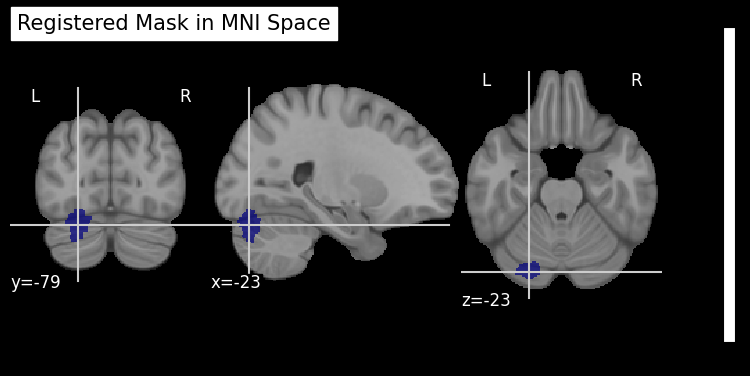

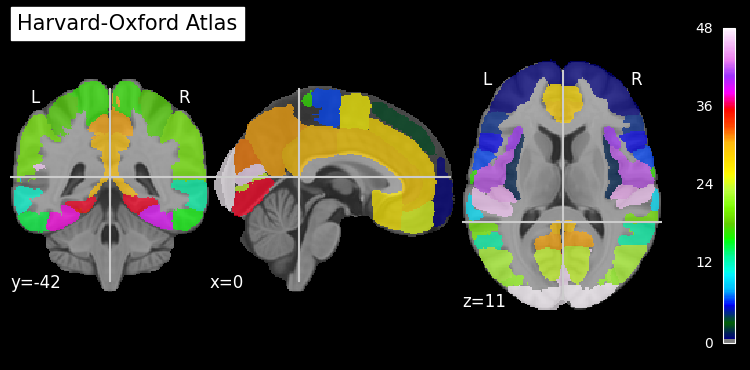

In [57]:
from nilearn import plotting
mask_img = nib.load('/workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0041-1_t1c_gtv_mask.nii.gz')
atlas = nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr25-1mm')
atlas_img = nib.load(atlas['filename'])
plotting.plot_roi(mask_img, bg_img=mni_file, title="Registered Mask in MNI Space")
plotting.plot_roi(atlas_img, bg_img=mni_file, title="Harvard-Oxford Atlas")
plotting.show()

In [60]:
mask_img.affine

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [46]:
list

[['0011', 'Frontal', 'Occipital Lobe', {'Frontal': 0.6134969325153374}],
 ['0020', None, 'Occipital Lobe', {}],
 ['0022', None, 'Temporal Lobe', {}],
 ['0041', 'Temporal', 'Temporal Lobe', {'Temporal': 26.093138997511556}],
 ['0045',
  'Frontal',
  'Occipital Lobe',
  {'Frontal': 6.492912665752172, 'Temporal': 1.9433013260173753}],
 ['0053', None, 'Temporal Lobe', {}],
 ['0068',
  'Frontal',
  'Occipital Lobe',
  {'Frontal': 5.53593119528643,
   'Insula': 0.17173254401519064,
   'Parietal': 0.11169596358711588,
   'Temporal': 2.126411906789718}],
 ['0075',
  'Frontal',
  'Temporal Lobe',
  {'Insula': 7.548102673973054,
   'Occipital': 7.4121379424003955,
   'Frontal': 8.042519879691815}],
 ['0086',
  'Frontal',
  'Cerebellum',
  {'Frontal': 23.563576830123957,
   'Occipital': 3.9759881499961023,
   'Temporal': 0.19490137990176973}],
 ['0087', 'Parietal', 'Temporal Lobe', {'Parietal': 43.19702602230483}],
 ['0092',
  'Frontal',
  'Cerebellum',
  {'Frontal': 30.802259887005654, 'Occipita

In [61]:
atlas_img.affine

array([[  -1.,    0.,    0.,   90.],
       [   0.,    1.,    0., -126.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [141]:
import pandas as pd
dfRegion = pd.DataFrame(list,columns=['id', 'lobe_overlap', 'lobe_centroid', 'lobe_overlap_dict'])
dfRegion['lobe_overlap'].value_counts()

lobe_overlap
Frontal      32
Parietal      5
Temporal      4
Occipital     4
Insula        1
Name: count, dtype: int64

In [144]:
dfRegion[['id','lobe_overlap']]

,id,lobe_overlap
0,0011,Frontal
1,0020,Frontal
2,0022,None
3,0041,Temporal
4,0045,Frontal
5,0053,None
6,0068,Frontal
7,0075,Occipital
8,0086,Frontal
9,0087,Parietal


In [ ]:
import pandas as pd
dfRegionV = pd.DataFrame(listV,columns=['id', 'lobe_overlap', 'lobe_centroid', 'lobe_overlap_dict'])
dfRegionV['lobe_overlap'].value_counts()

In [127]:
dfRegionV['lobe_overlap'].value_counts()

lobe_overlap
Frontal      20
Temporal      7
Occipital     6
Parietal      5
Insula        3
Name: count, dtype: int64

In [51]:
dfRegion.head(20)

,id,lobe_overlap,lobe_centroid,lobe_overlap_dict
0,0011,Frontal,Occipital Lobe,{'Frontal': 0.6134969325153374}
1,0020,None,Occipital Lobe,{}
2,0022,None,Temporal Lobe,{}
3,0041,Temporal,Temporal Lobe,{'Temporal': 26.093138997511556}
4,0045,Frontal,Occipital Lobe,"{'Frontal': 6.492912665752172, 'Temporal': 1.9..."
5,0053,None,Temporal Lobe,{}
6,0068,Frontal,Occipital Lobe,"{'Frontal': 5.53593119528643, 'Insula': 0.1717..."
7,0075,Frontal,Temporal Lobe,"{'Insula': 7.548102673973054, 'Occipital': 7.4..."
8,0086,Frontal,Cerebellum,"{'Frontal': 23.563576830123957, 'Occipital': 3..."
9,0087,Parietal,Temporal Lobe,{'Parietal': 43.19702602230483}


lobe_overlap
Frontal      32
Parietal      5
Temporal      4
Occipital     4
Insula        1
Name: count, dtype: int64

In [126]:
dfRegion

,id,lobe_overlap,lobe_centroid,lobe_overlap_dict
0,0011,Frontal,Occipital Lobe,{'Frontal': 0.6134969325153374}
1,0020,None,Occipital Lobe,{}
2,0022,None,Frontal Lobe,{}
3,0041,Temporal,Cerebellum,{'Temporal': 26.093138997511556}
4,0045,Frontal,Occipital Lobe,"{'Frontal': 6.492912665752172, 'Temporal': 1.9..."
5,0053,None,Frontal Lobe,{}
6,0068,Frontal,Occipital Lobe,"{'Frontal': 5.53593119528643, 'Insula': 0.1717..."
7,0075,Frontal,Frontal Lobe,"{'Insula': 7.548102673973054, 'Occipital': 7.4..."
8,0086,Frontal,Cerebellum,"{'Frontal': 23.563576830123957, 'Occipital': 3..."
9,0087,Parietal,Occipital Lobe,{'Parietal': 43.19702602230483}


In [53]:
dfRA = pd.concat([dfRegion[['id','lobe_overlap']], dfRegionV[['id','lobe_overlap']] ])

In [ ]:
dfRA['id'] = dfRA['id'].astype(str)
dfRA
dfRA.to_csv('/workspaces/data/MegaGen/logs/SCORE/CSVS/id_lobe.csv')

In [59]:
dfRegion[['id','lobe_overlap']].to_csv('/workspaces/data/MegaGen/logs/SCORE/CSVS/id_test_lobe.csv')

In [55]:
dfRA.dtypes

id              object
lobe_overlap    object
dtype: object

In [15]:
mask_img.shape

(197, 233, 189)

In [75]:
apply_affine(atlas_img.affine , np.argwhere(atlas_img.get_fdata()==1).mean(axis=0) )

array([ 2.60975791, 52.55349406,  7.86845587])

In [76]:
apply_affine(atlas_img.affine , np.argwhere(atlas_img.get_fdata()==48).mean(axis=0) )

array([ 4.45524504e-03, -9.58328926e+01,  7.50325209e+00])

'Frontal Pole'

In [42]:
np.argwhere(mask_img.get_fdata()>0).mean(axis=0)

array([ 93.21274118, 205.57052562, 100.11194278])

In [43]:
maskT = nib.load('/workspaces/data/brain_meningioma/bet/b_test_mni/BraTS-MEN-RT-0041-1_t1c_gtv_mask.nii.gz')

In [44]:
np.argwhere(maskT.get_fdata()>0).mean(axis=0)

array([74.49804479, 54.62424458, 48.38570921])

In [47]:
np.argwhere(mask_data>0).mean(axis=0)

array([ 93.21274118, 205.57052562, 100.11194278])

In [48]:
np.unique(atlas_data[maskT.get_fdata()>0])

array([ 0., 40.])

In [54]:
mask_img.affine

array([[   1.,    0.,    0.,  -98.],
       [   0.,    1.,    0., -134.],
       [   0.,    0.,    1.,  -72.],
       [   0.,    0.,    0.,    1.]])

In [37]:
mni0 = nib.load('/home/vscode/fsl/data/atlases/MNI/MNI-maxprob-thr25-1mm.nii.gz')

In [38]:
pd.Series(mni0.get_fdata().flatten()).value_counts()

0.0    5762286
3.0     467309
6.0     288809
8.0     240864
2.0     215395
5.0     173347
9.0      20242
4.0      19697
1.0      16678
7.0      16405
Name: count, dtype: int64